# Programming for Data Science
# Mini Project 

# Predicting Medical Insurance Charges
## Khoula Al Kharusi        119759

### Research Questions:
1. Is there a correlation between heath factors of the dataset? If so, how much are they correlated?
2. What is the most correlated feature in the dataset to the insurance cost?
3. Can you use the given health factors to predict medical insurance charge

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib notebook

### load dataset and explore it


dataset source: https://www.kaggle.com/mirichoi0218/insurance

In [2]:
df = pd.read_csv('insurance.csv', sep=',')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Hare we explore the dataset in general before analysis process. The dataset contains 1338 datapoint (rows) and 7 features (columns). There is no null values in the dataset and it looks very clean.

In [3]:
print("Dataset shape (rows,columns): ", df.shape)
print()
print("Dataset index: ", df.index)
print()
print("Dataset columns: ", df.columns)
print()
print("Number of  non-Null values in the Dataset: ")
print(df.count())
print()
print("Basic info about the dataset")
print(df.info())
print()

Dataset shape (rows,columns):  (1338, 7)

Dataset index:  RangeIndex(start=0, stop=1338, step=1)

Dataset columns:  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Number of  non-Null values in the Dataset: 
age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

Basic info about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None



To get more into the data and see the destribution (describe) function is used.

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In this dataset our dependent variable is "charges". so it is useful to see how it is destributed.

<IPython.core.display.Javascript object>


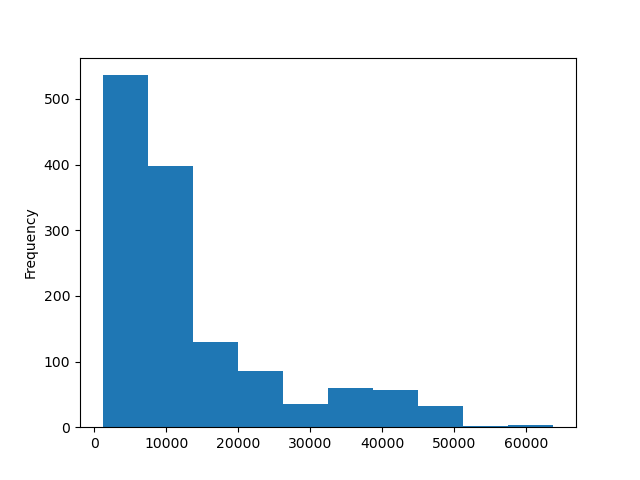

In [5]:
ax = df["charges"].plot.hist()

From the histogram it is clear that the insurance charges is right-skewed

## Data preparation 

prepare the data, first by replacing the catigorical variabels by numerical values so we can use them as an input data for the regression model

In [6]:
# prepare X and Y
df = df.replace({"male": 0 , "female": 1})
df = df.replace(["yes", "no"], [1, 0])
df = df.replace(["southeast", "southwest", "northeast", "northwest"], [0, 1, 2, 3])
df


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,2,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


### Corrilation analysis

#### 1. Is there a correlation between heath factors of the dataset? If so, how much are they correlated?

The corrilation between all the neumerical variables is shown in the heatmap. The heatmap summarize the corrilation vesually. 

<IPython.core.display.Javascript object>


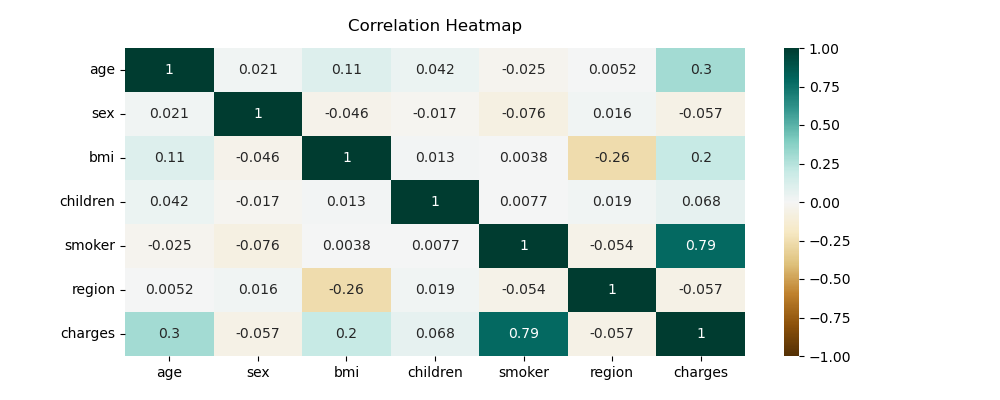

In [7]:
plt.figure(figsize=(10, 4))
# Set the range of values to be displayed on the colormap from -1 to 1
# Set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

From the figure it is clear that the only strong correlation (more than 0.6) is between (smoker and charge.In the other hand, there is a many week correlations between the pair of(age and charges)and between (bmi and charges). The correlation is considered very weak between the rest varabels.

#### 2. What is the most correlated feature in the dataset to the insurance cost?

<IPython.core.display.Javascript object>


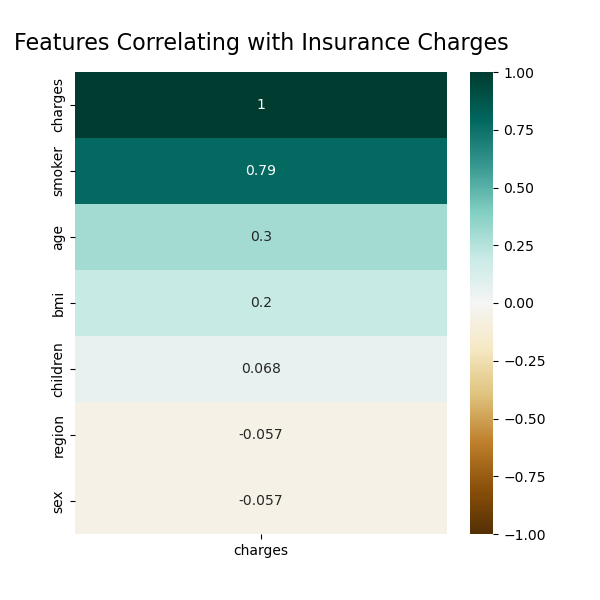

In [8]:
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(df.corr()[['charges']].sort_values(by='charges', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Insurance Charges', fontdict={'fontsize':16}, pad=16);

From the figure smoker is the most correlated feature to the insurance charges. This is maybe related to the fact that the insurance company needs to collect more in yearly premiums than it spends on medical care in order to to make money. Therefore they collect more from smokers  who are more likely needs medical care due to the side effects of the smoking.

## Predicting medical insurance charge

### build linear regression model to predect the insurance charge

In [9]:
X = df.filter(["age","sex", "bmi","children", "smoker", "region"], axis=1)
y = df["charges"].values

In [10]:

#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
reg = LinearRegression()

In [11]:
#use k-fold CV to evaluate model
scores = cross_val_score(reg, X, y, scoring='r2', cv=cv, n_jobs=-1)

#view Coefficient of dertermination or R-squared
np.mean(scores)


0.7441653133517891

Coefficient of dertermination or R-squared the closer it gets to 1.0, the better the model perfectly explains the data. Here the R-squared is 0.744 which means that 74% of the variation in the insurance charges is explained by regression model.

#### 3. Can you use the given health factors to predict medical insurance charge

Here the same regression model is used to predict some values that appears in the dataset and then the predicted and the actual insurance charge will be printed. 

In [12]:
# split into train-test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.9)

reg.fit(X_train, y_train)

# predictions
y_hats = reg.predict(X_test)
print("Predicted Charges           Actual Charges")
for i in range(20):
    print(str(y_hats[i])+"           " + str(y_test[i]))
#print(y_hats)

Predicted Charges           Actual Charges
2460.7872131060412           1622.1885
13427.465382673441           10381.4787
39897.507671317595           48517.56315
5990.053110606508           1759.338
-1377.0799397332812           1727.785
26709.668596072435           17748.5062
27493.823441021326           34617.84065
10456.68733714404           4266.1658
30556.74988313469           38344.566
14104.879459938444           9391.346
17251.93454671363           14901.5167
12932.76463237106           12730.9996
9939.21407443009           12029.2867
11664.70814891409           9283.562
6813.317790230709           5484.4673
15043.863596335023           10982.5013
4307.8131408805875           2897.3235
8164.014262139912           7151.092
2303.338798427654           1967.0227
1403.9529136456804           2913.569
